In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import riesling as rl

In [2]:
%env RL_VERBOSITY=0
prefix='algos'
!rm {prefix}*.h5
matrix = 64
voxsz = 3
channels = 4
!riesling phantom {prefix} --matrix={matrix} --vox-size={voxsz} --channels={channels} --nex=0.5
!riesling sense-sim {prefix} --matrix={matrix} --vox-size={voxsz} --channels={channels}
!riesling recon --fwd --sense={prefix}-sense.h5 {prefix}.h5
!mv {prefix}-recon.h5 {prefix}.h5
!riesling sdc {prefix}.h5 --kernel=ES7

env: RL_VERBOSITY=0
zsh:1: no matches found: algos*.h5


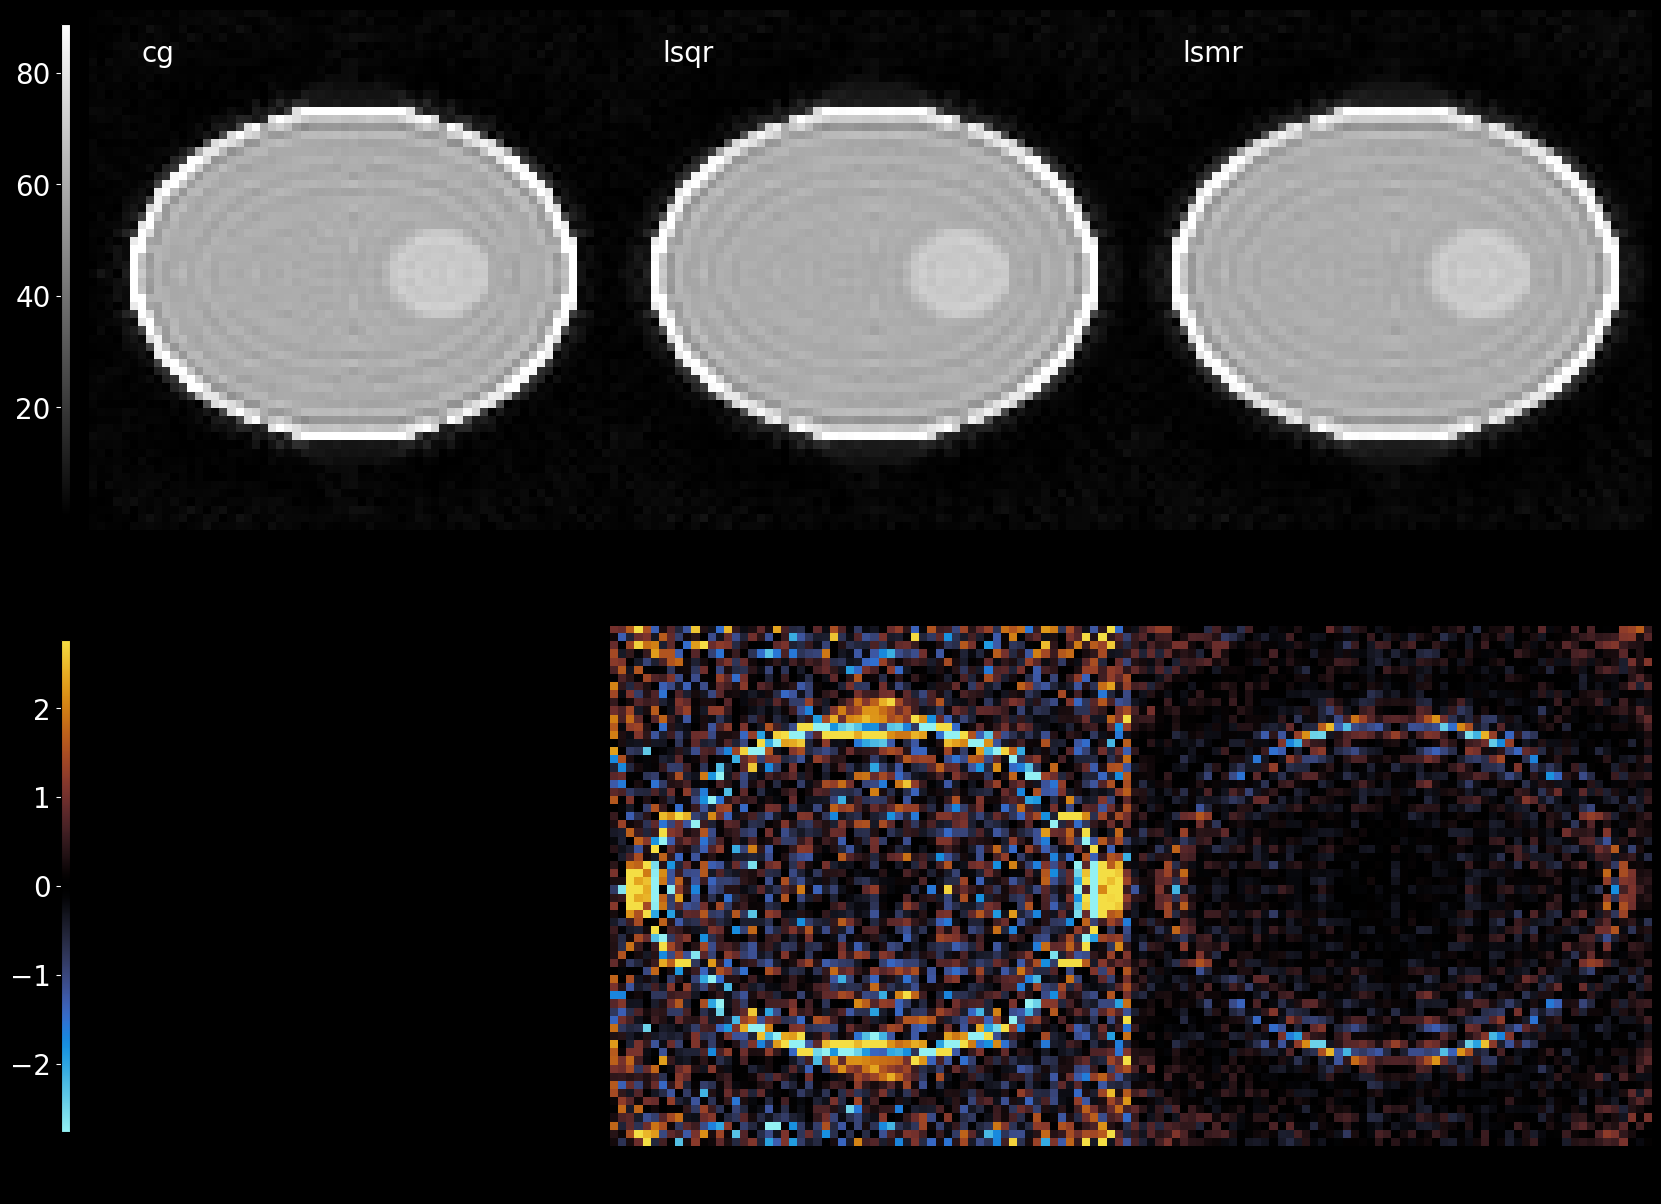

In [7]:
its=16
algos=['cg','lsqr','lsmr']
opts={'lsmr':f'--sdc=none --pre=kspace --max-its={its}', 'lsqr':f'--sdc=none --pre=kspace --max-its={its}', 'cg':f'--sdc={prefix}-sdc.h5 --max-its={its}'}
for a in algos:
    !riesling {a} {opts[a]} {prefix}.h5 --out={prefix} --sense={prefix}-sense.h5 --debug={a}-debug.h5
files=[f'{prefix}-{a}.h5' for a in algos]
rl.images.diffL(files, titles=algos)

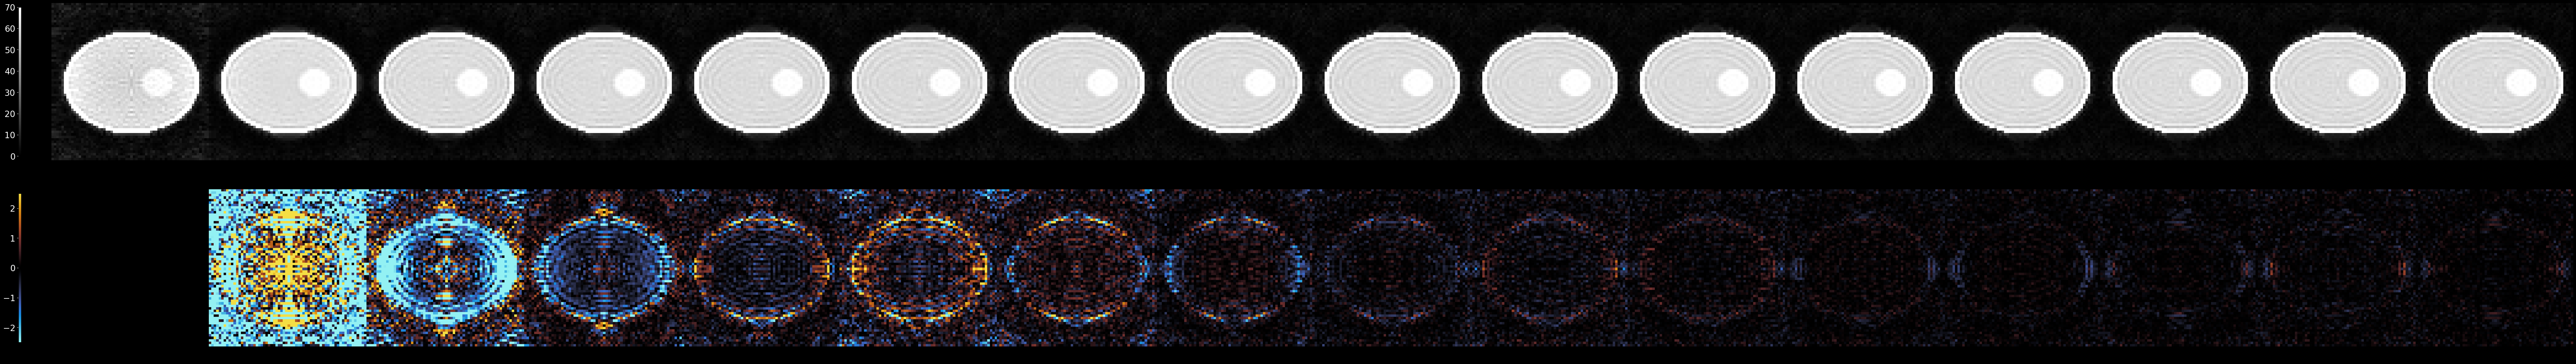

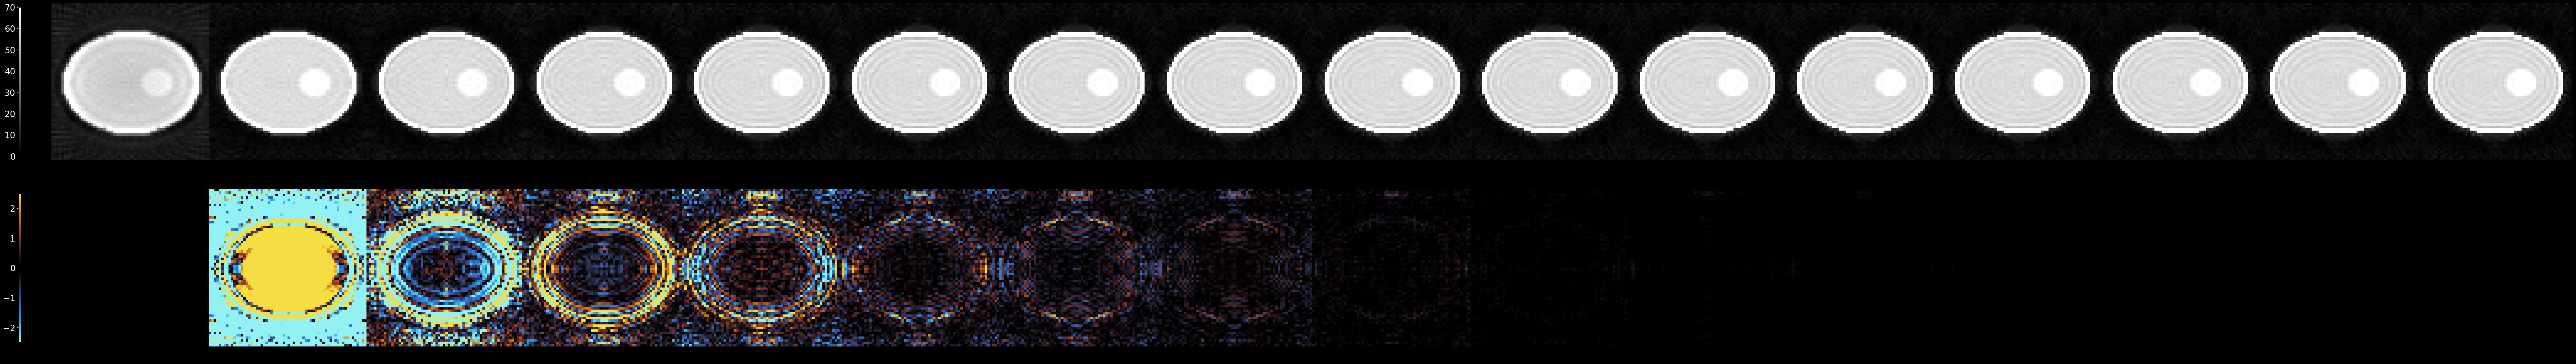

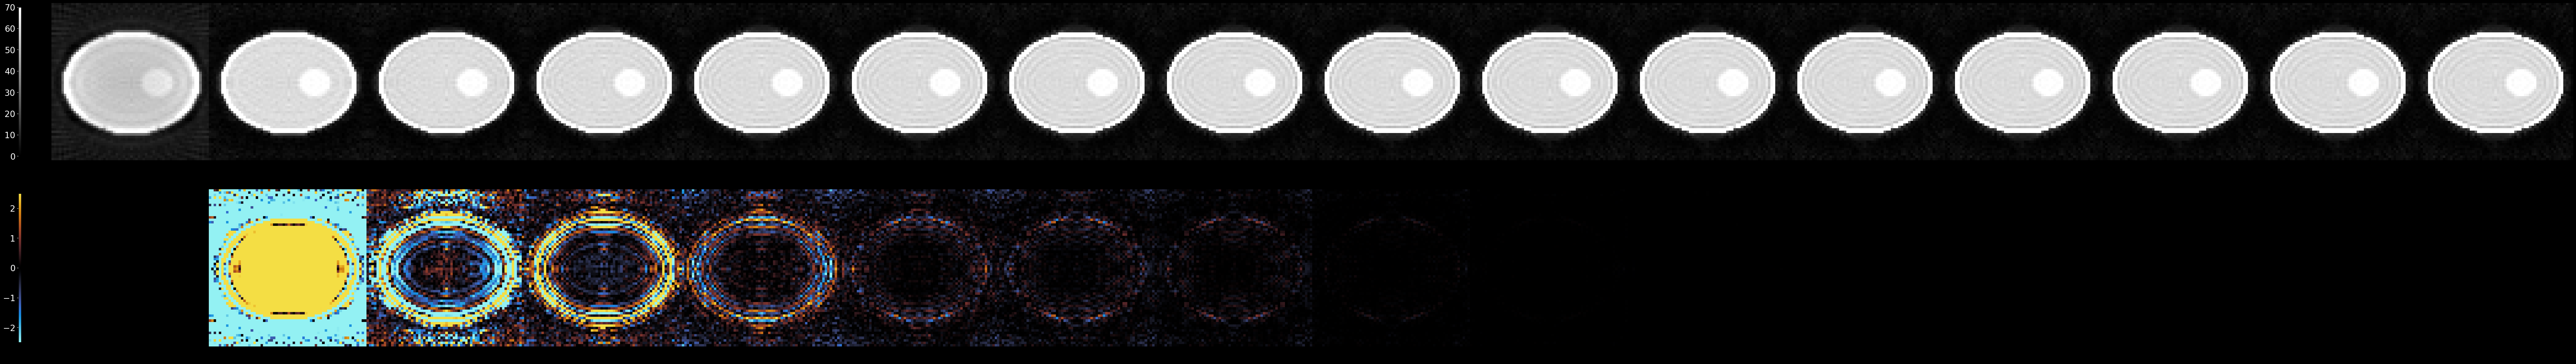

In [8]:
for (file, dset) in zip(['cg-debug.h5','lsqr-debug.h5','lsmr-debug.h5'], ['cg-x', 'lsqr-x', 'lsmr-x']):
    files = [file,]*its
    dsets=[f'{dset}-{i:02d}' for i in range(its)]
    display(rl.images.diffL(files, dsets=dsets, clim=[0,70], difflim=[-2.5,2.5]))